# Getting Started

you need to install hftbacktest first.

In [1]:
#!pip install hftbacktest

### Loading data

In [2]:
import pandas as pd

# Read gzipped-pickled DataFrame
# Sample data is Binance Futures BNBUSDT
df = pd.read_pickle("usdm/bnbusdt_20221117.pkl", compression='gzip')

# Market depth feed of the data is changes of the quantity of a price.
# So you need the initial snapshot of the market depth in order to build the market depth correctly.
# bnbusdt_20221116.snapshot.pkl is the End-Of-Day(UTC 00:00) market depth snapshot so it's the initial snapshot of 20221117.
snapshot_df = pd.read_pickle("usdm/bnbusdt_20221116.snapshot.pkl", compression='gzip')

### Correcting timestamps, we will look into this later again.

In [3]:
from hftbacktest import correct

df = correct(df, 5_000)

local_timestamp is ahead of exch_timestamp by 1165.0
found 12781 rows that exch_timestamp is ahead of the previous exch_timestamp
Correction is done.


### Printing the best bid and the best ask

In [4]:
from numba import njit

# numba.njit is strongly recommended for fast backtesting.
@njit
def print_bbo(hbt):
    # Iterating until hftbacktest reaches the end of data.
    while hbt.run:
        # Move local_timestamp for a given time. time unit is the same as data's timestamp's unit.
        # timestamp of the sample data is in microseconds.
        # Elapse 60-sec every iteration.
        if not hbt.elapse(60 * 1e6):
            # hftbacktest encounters the end of data while elapsing.
            return False
        
        # Print the best bid and the best offer.
        print('local_timestamp:', hbt.local_timestamp,
              ', best_bid:', round(hbt.best_bid, 3),
              ', best_ask:', round(hbt.best_ask, 3))
    return True

In [5]:
from hftbacktest import HftBacktest, FeedLatency, Linear

hbt = HftBacktest(df,
                  tick_size=0.01,   # Tick size of a target trading asset
                  lot_size=0.01,    # Lot size of a target trading asset, minimum trading unit.
                  maker_fee=0.0002, # 0.02%, Maker fee, rebates if it is negative.
                  taker_fee=0.0007, # 0.07%, Taker fee. 
                  order_latency=FeedLatency(), # Latency model: ConstantLatency, FeedLatency.
                  asset_type=Linear, # Asset type: Linear, Inverse.
                  snapshot=snapshot_df) 

You can see the best bid and the best ask every 60-sec.

In [6]:
print_bbo(hbt)

local_timestamp: 1668643260012400 , best_bid: 272.18 , best_ask: 272.19
local_timestamp: 1668643320012400 , best_bid: 271.97 , best_ask: 271.98
local_timestamp: 1668643380012400 , best_bid: 272.32 , best_ask: 272.33
local_timestamp: 1668643440012400 , best_bid: 272.46 , best_ask: 272.47
local_timestamp: 1668643500012400 , best_bid: 272.27 , best_ask: 272.29
local_timestamp: 1668643560012400 , best_bid: 272.1 , best_ask: 272.11
local_timestamp: 1668643620012400 , best_bid: 272.29 , best_ask: 272.3
local_timestamp: 1668643680012400 , best_bid: 272.14 , best_ask: 272.15
local_timestamp: 1668643740012400 , best_bid: 272.3 , best_ask: 272.31
local_timestamp: 1668643800012400 , best_bid: 272.52 , best_ask: 272.53
local_timestamp: 1668643860012400 , best_bid: 272.36 , best_ask: 272.37
local_timestamp: 1668643920012400 , best_bid: 272.58 , best_ask: 272.59
local_timestamp: 1668643980012400 , best_bid: 272.51 , best_ask: 272.52
local_timestamp: 1668644040012400 , best_bid: 272.44 , best_ask: 27

local_timestamp: 1668655500012400 , best_bid: 271.72 , best_ask: 271.73
local_timestamp: 1668655560012400 , best_bid: 271.7 , best_ask: 271.71
local_timestamp: 1668655620012400 , best_bid: 271.77 , best_ask: 271.78
local_timestamp: 1668655680012400 , best_bid: 271.73 , best_ask: 271.74
local_timestamp: 1668655740012400 , best_bid: 271.71 , best_ask: 271.72
local_timestamp: 1668655800012400 , best_bid: 271.58 , best_ask: 271.59
local_timestamp: 1668655860012400 , best_bid: 271.41 , best_ask: 271.42
local_timestamp: 1668655920012400 , best_bid: 271.52 , best_ask: 271.53
local_timestamp: 1668655980012400 , best_bid: 271.76 , best_ask: 271.77
local_timestamp: 1668656040012400 , best_bid: 271.75 , best_ask: 271.76
local_timestamp: 1668656100012400 , best_bid: 271.67 , best_ask: 271.68
local_timestamp: 1668656160012400 , best_bid: 271.7 , best_ask: 271.71
local_timestamp: 1668656220012400 , best_bid: 271.5 , best_ask: 271.51
local_timestamp: 1668656280012400 , best_bid: 271.4 , best_ask: 271

local_timestamp: 1668665220012400 , best_bid: 269.96 , best_ask: 269.97
local_timestamp: 1668665280012400 , best_bid: 269.95 , best_ask: 269.96
local_timestamp: 1668665340012400 , best_bid: 270.17 , best_ask: 270.18
local_timestamp: 1668665400012400 , best_bid: 270.17 , best_ask: 270.18
local_timestamp: 1668665460012400 , best_bid: 270.23 , best_ask: 270.24
local_timestamp: 1668665520012400 , best_bid: 270.2 , best_ask: 270.21
local_timestamp: 1668665580012400 , best_bid: 270.41 , best_ask: 270.42
local_timestamp: 1668665640012400 , best_bid: 270.37 , best_ask: 270.38
local_timestamp: 1668665700012400 , best_bid: 270.56 , best_ask: 270.57
local_timestamp: 1668665760012400 , best_bid: 270.39 , best_ask: 270.4
local_timestamp: 1668665820012400 , best_bid: 270.34 , best_ask: 270.35
local_timestamp: 1668665880012400 , best_bid: 270.51 , best_ask: 270.52
local_timestamp: 1668665940012400 , best_bid: 270.67 , best_ask: 270.68
local_timestamp: 1668666000012400 , best_bid: 270.63 , best_ask: 2

local_timestamp: 1668676020012400 , best_bid: 268.52 , best_ask: 268.53
local_timestamp: 1668676080012400 , best_bid: 268.58 , best_ask: 268.59
local_timestamp: 1668676140012400 , best_bid: 268.53 , best_ask: 268.54
local_timestamp: 1668676200012400 , best_bid: 268.52 , best_ask: 268.53
local_timestamp: 1668676260012400 , best_bid: 268.45 , best_ask: 268.46
local_timestamp: 1668676320012400 , best_bid: 268.51 , best_ask: 268.52
local_timestamp: 1668676380012400 , best_bid: 268.49 , best_ask: 268.5
local_timestamp: 1668676440012400 , best_bid: 268.49 , best_ask: 268.5
local_timestamp: 1668676500012400 , best_bid: 268.48 , best_ask: 268.49
local_timestamp: 1668676560012400 , best_bid: 268.36 , best_ask: 268.37
local_timestamp: 1668676620012400 , best_bid: 268.46 , best_ask: 268.47
local_timestamp: 1668676680012400 , best_bid: 268.37 , best_ask: 268.38
local_timestamp: 1668676740012400 , best_bid: 268.45 , best_ask: 268.46
local_timestamp: 1668676800012400 , best_bid: 268.39 , best_ask: 2

local_timestamp: 1668683760012400 , best_bid: 267.16 , best_ask: 267.17
local_timestamp: 1668683820012400 , best_bid: 266.86 , best_ask: 266.87
local_timestamp: 1668683880012400 , best_bid: 267.26 , best_ask: 267.27
local_timestamp: 1668683940012400 , best_bid: 267.3 , best_ask: 267.31
local_timestamp: 1668684000012400 , best_bid: 267.16 , best_ask: 267.17
local_timestamp: 1668684060012400 , best_bid: 267.08 , best_ask: 267.09
local_timestamp: 1668684120012400 , best_bid: 267.02 , best_ask: 267.03
local_timestamp: 1668684180012400 , best_bid: 267.06 , best_ask: 267.07
local_timestamp: 1668684240012400 , best_bid: 267.09 , best_ask: 267.1
local_timestamp: 1668684300012400 , best_bid: 267.13 , best_ask: 267.14
local_timestamp: 1668684360012400 , best_bid: 267.0 , best_ask: 267.01
local_timestamp: 1668684420012400 , best_bid: 266.7 , best_ask: 266.71
local_timestamp: 1668684480012400 , best_bid: 266.92 , best_ask: 266.93
local_timestamp: 1668684540012400 , best_bid: 266.91 , best_ask: 266

local_timestamp: 1668693360012400 , best_bid: 265.28 , best_ask: 265.29
local_timestamp: 1668693420012400 , best_bid: 265.53 , best_ask: 265.54
local_timestamp: 1668693480012400 , best_bid: 265.71 , best_ask: 265.72
local_timestamp: 1668693540012400 , best_bid: 265.68 , best_ask: 265.69
local_timestamp: 1668693600012400 , best_bid: 265.84 , best_ask: 265.85
local_timestamp: 1668693660012400 , best_bid: 265.8 , best_ask: 265.81
local_timestamp: 1668693720012400 , best_bid: 265.96 , best_ask: 265.97
local_timestamp: 1668693780012400 , best_bid: 266.1 , best_ask: 266.11
local_timestamp: 1668693840012400 , best_bid: 266.28 , best_ask: 266.29
local_timestamp: 1668693900012400 , best_bid: 266.15 , best_ask: 266.16
local_timestamp: 1668693960012400 , best_bid: 266.39 , best_ask: 266.4
local_timestamp: 1668694020012400 , best_bid: 265.86 , best_ask: 265.87
local_timestamp: 1668694080012400 , best_bid: 265.67 , best_ask: 265.68
local_timestamp: 1668694140012400 , best_bid: 265.89 , best_ask: 26

local_timestamp: 1668701280012400 , best_bid: 267.29 , best_ask: 267.3
local_timestamp: 1668701340012400 , best_bid: 267.21 , best_ask: 267.23
local_timestamp: 1668701400012400 , best_bid: 266.92 , best_ask: 266.93
local_timestamp: 1668701460012400 , best_bid: 266.93 , best_ask: 266.94
local_timestamp: 1668701520012400 , best_bid: 267.22 , best_ask: 267.23
local_timestamp: 1668701580012400 , best_bid: 267.22 , best_ask: 267.23
local_timestamp: 1668701640012400 , best_bid: 267.45 , best_ask: 267.48
local_timestamp: 1668701700012400 , best_bid: 267.86 , best_ask: 267.87
local_timestamp: 1668701760012400 , best_bid: 267.6 , best_ask: 267.61
local_timestamp: 1668701820012400 , best_bid: 267.79 , best_ask: 267.8
local_timestamp: 1668701880012400 , best_bid: 267.84 , best_ask: 267.85
local_timestamp: 1668701940012400 , best_bid: 268.01 , best_ask: 268.02
local_timestamp: 1668702000012400 , best_bid: 267.83 , best_ask: 267.84
local_timestamp: 1668702060012400 , best_bid: 267.52 , best_ask: 26

local_timestamp: 1668710100012400 , best_bid: 267.7 , best_ask: 267.71
local_timestamp: 1668710160012400 , best_bid: 267.73 , best_ask: 267.74
local_timestamp: 1668710220012400 , best_bid: 268.03 , best_ask: 268.04
local_timestamp: 1668710280012400 , best_bid: 268.09 , best_ask: 268.1
local_timestamp: 1668710340012400 , best_bid: 268.07 , best_ask: 268.08
local_timestamp: 1668710400012400 , best_bid: 268.03 , best_ask: 268.04
local_timestamp: 1668710460012400 , best_bid: 267.96 , best_ask: 267.97
local_timestamp: 1668710520012400 , best_bid: 268.14 , best_ask: 268.15
local_timestamp: 1668710580012400 , best_bid: 267.96 , best_ask: 267.97
local_timestamp: 1668710640012400 , best_bid: 268.18 , best_ask: 268.19
local_timestamp: 1668710700012400 , best_bid: 268.15 , best_ask: 268.16
local_timestamp: 1668710760012400 , best_bid: 268.0 , best_ask: 268.01
local_timestamp: 1668710820012400 , best_bid: 268.13 , best_ask: 268.14
local_timestamp: 1668710880012400 , best_bid: 268.15 , best_ask: 26

local_timestamp: 1668723840012400 , best_bid: 268.41 , best_ask: 268.42
local_timestamp: 1668723900012400 , best_bid: 268.35 , best_ask: 268.36
local_timestamp: 1668723960012400 , best_bid: 268.16 , best_ask: 268.17
local_timestamp: 1668724020012400 , best_bid: 267.98 , best_ask: 267.99
local_timestamp: 1668724080012400 , best_bid: 268.13 , best_ask: 268.14
local_timestamp: 1668724140012400 , best_bid: 268.2 , best_ask: 268.21
local_timestamp: 1668724200012400 , best_bid: 268.01 , best_ask: 268.02
local_timestamp: 1668724260012400 , best_bid: 267.9 , best_ask: 267.91
local_timestamp: 1668724320012400 , best_bid: 268.0 , best_ask: 268.01
local_timestamp: 1668724380012400 , best_bid: 268.22 , best_ask: 268.23
local_timestamp: 1668724440012400 , best_bid: 268.26 , best_ask: 268.27
local_timestamp: 1668724500012400 , best_bid: 268.35 , best_ask: 268.36
local_timestamp: 1668724560012400 , best_bid: 268.41 , best_ask: 268.42
local_timestamp: 1668724620012400 , best_bid: 268.38 , best_ask: 26

False

### Getting market depth

In [7]:
@njit
def print_3depth(hbt):
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        # a key of bid_depth or ask_depth is price in tick format.
        # (integer) price_tick = price / tick_size
        print('local_timestamp:', hbt.local_timestamp)
        i = 0
        for tick_price in range(hbt.best_ask_tick, hbt.high_ask_tick + 1):
            if tick_price in hbt.ask_depth:
                print('ask: ', hbt.ask_depth[tick_price], '@', round(tick_price * hbt.tick_size, 3))
                i += 1
                if i == 3:
                    break
        i = 0
        for tick_price in range(hbt.best_bid_tick, hbt.low_bid_tick - 1, -1):
            if tick_price in hbt.bid_depth:
                print('bid: ', hbt.bid_depth[tick_price], '@', round(tick_price * hbt.tick_size, 3))
                i += 1
                if i == 3:
                    break
    return True

In [8]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
print_3depth(hbt)

local_timestamp: 1668643260012400
ask:  0.27 @ 272.19
ask:  3.7 @ 272.2
ask:  7.98 @ 272.21
bid:  9.33 @ 272.18
bid:  5.82 @ 272.17
bid:  18.83 @ 272.16
local_timestamp: 1668643320012400
ask:  7.54 @ 271.98
ask:  13.32 @ 271.99
ask:  2.83 @ 272.0
bid:  31.93 @ 271.97
bid:  8.66 @ 271.95
bid:  32.91 @ 271.94
local_timestamp: 1668643380012400
ask:  14.44 @ 272.33
ask:  4.14 @ 272.34
ask:  18.76 @ 272.35
bid:  0.72 @ 272.32
bid:  6.89 @ 272.31
bid:  5.02 @ 272.3
local_timestamp: 1668643440012400
ask:  42.64 @ 272.47
ask:  19.68 @ 272.48
ask:  47.57 @ 272.49
bid:  0.41 @ 272.46
bid:  1.93 @ 272.43
bid:  3.95 @ 272.42
local_timestamp: 1668643500012400
ask:  4.0 @ 272.29
ask:  6.19 @ 272.3
ask:  22.76 @ 272.31
bid:  15.78 @ 272.27
bid:  25.48 @ 272.26
bid:  2.96 @ 272.25
local_timestamp: 1668643560012400
ask:  0.79 @ 272.11
ask:  4.61 @ 272.12
ask:  9.68 @ 272.13
bid:  4.07 @ 272.1
bid:  4.7 @ 272.09
bid:  1.82 @ 272.08
local_timestamp: 1668643620012400
ask:  22.22 @ 272.3
ask:  10.86 @ 272.

local_timestamp: 1668654000012400
ask:  16.44 @ 271.39
ask:  1.91 @ 271.4
ask:  14.67 @ 271.41
bid:  13.27 @ 271.38
bid:  11.74 @ 271.37
bid:  23.81 @ 271.36
local_timestamp: 1668654060012400
ask:  1.25 @ 271.69
ask:  8.34 @ 271.7
ask:  5.45 @ 271.71
bid:  74.67 @ 271.67
bid:  12.26 @ 271.66
bid:  59.66 @ 271.65
local_timestamp: 1668654120012400
ask:  0.15 @ 271.76
ask:  1.99 @ 271.77
ask:  9.5 @ 271.78
bid:  9.02 @ 271.75
bid:  10.73 @ 271.74
bid:  26.07 @ 271.73
local_timestamp: 1668654180012400
ask:  2.34 @ 271.82
ask:  1.77 @ 271.83
ask:  4.81 @ 271.84
bid:  7.66 @ 271.81
bid:  51.89 @ 271.8
bid:  44.06 @ 271.79
local_timestamp: 1668654240012400
ask:  0.05 @ 271.85
ask:  0.28 @ 271.86
ask:  2.51 @ 271.87
bid:  8.55 @ 271.84
bid:  15.0 @ 271.83
bid:  21.89 @ 271.82
local_timestamp: 1668654300012400
ask:  2.74 @ 271.93
ask:  0.93 @ 271.94
ask:  9.99 @ 271.95
bid:  2.94 @ 271.92
bid:  12.06 @ 271.91
bid:  23.97 @ 271.9
local_timestamp: 1668654360012400
ask:  10.21 @ 271.81
ask:  317.7

bid:  28.69 @ 269.57
local_timestamp: 1668662520012400
ask:  0.73 @ 269.88
ask:  1.43 @ 269.89
ask:  32.71 @ 269.92
bid:  11.05 @ 269.87
bid:  17.86 @ 269.86
bid:  33.0 @ 269.85
local_timestamp: 1668662580012400
ask:  23.52 @ 269.69
ask:  62.28 @ 269.7
ask:  11.28 @ 269.71
bid:  0.15 @ 269.68
bid:  0.12 @ 269.67
bid:  16.0 @ 269.65
local_timestamp: 1668662640012400
ask:  0.06 @ 269.71
ask:  1.38 @ 269.72
ask:  0.84 @ 269.73
bid:  46.22 @ 269.7
bid:  15.47 @ 269.69
bid:  51.03 @ 269.68
local_timestamp: 1668662700012400
ask:  3.25 @ 269.81
ask:  2.71 @ 269.82
ask:  19.72 @ 269.84
bid:  6.65 @ 269.8
bid:  9.13 @ 269.79
bid:  13.15 @ 269.78
local_timestamp: 1668662760012400
ask:  7.23 @ 269.68
ask:  8.2 @ 269.69
ask:  28.25 @ 269.7
bid:  26.36 @ 269.67
bid:  2.08 @ 269.66
bid:  9.27 @ 269.65
local_timestamp: 1668662820012400
ask:  7.79 @ 269.8
ask:  92.18 @ 269.81
ask:  6.45 @ 269.82
bid:  4.96 @ 269.79
bid:  34.56 @ 269.78
bid:  13.0 @ 269.77
local_timestamp: 1668662880012400
ask:  9.79 @

local_timestamp: 1668672480012400
ask:  27.03 @ 269.71
ask:  8.82 @ 269.72
ask:  24.73 @ 269.73
bid:  0.74 @ 269.7
bid:  1.86 @ 269.67
bid:  16.01 @ 269.66
local_timestamp: 1668672540012400
ask:  29.28 @ 269.61
ask:  12.75 @ 269.62
ask:  31.27 @ 269.63
bid:  0.24 @ 269.6
bid:  0.87 @ 269.57
bid:  11.69 @ 269.56
local_timestamp: 1668672600012400
ask:  10.25 @ 269.5
ask:  3.78 @ 269.51
ask:  12.08 @ 269.52
bid:  4.31 @ 269.49
bid:  0.48 @ 269.48
bid:  20.97 @ 269.47
local_timestamp: 1668672660012400
ask:  0.27 @ 269.84
ask:  1.6 @ 269.85
ask:  0.37 @ 269.86
bid:  20.35 @ 269.83
bid:  7.58 @ 269.82
bid:  4.05 @ 269.81
local_timestamp: 1668672720012400
ask:  13.25 @ 269.5
ask:  20.1 @ 269.51
ask:  18.17 @ 269.52
bid:  10.6 @ 269.49
bid:  0.48 @ 269.48
bid:  19.6 @ 269.46
local_timestamp: 1668672780012400
ask:  23.43 @ 269.34
ask:  8.0 @ 269.35
ask:  25.48 @ 269.36
bid:  12.88 @ 269.33
bid:  4.24 @ 269.32
bid:  0.72 @ 269.31
local_timestamp: 1668672840012400
ask:  34.93 @ 269.5
ask:  19.97 

local_timestamp: 1668681000012400
ask:  1.37 @ 266.49
ask:  14.23 @ 266.5
ask:  10.26 @ 266.51
bid:  23.09 @ 266.48
bid:  11.89 @ 266.47
bid:  15.3 @ 266.46
local_timestamp: 1668681060012400
ask:  2.35 @ 266.14
ask:  2.08 @ 266.15
ask:  7.48 @ 266.16
bid:  8.72 @ 266.13
bid:  25.39 @ 266.12
bid:  27.73 @ 266.11
local_timestamp: 1668681120012400
ask:  10.9 @ 266.33
ask:  16.33 @ 266.34
ask:  4.25 @ 266.35
bid:  0.04 @ 266.32
bid:  1.49 @ 266.31
bid:  1.8 @ 266.3
local_timestamp: 1668681180012400
ask:  13.28 @ 266.16
ask:  9.74 @ 266.17
ask:  18.57 @ 266.18
bid:  8.32 @ 266.15
bid:  2.82 @ 266.14
bid:  12.04 @ 266.13
local_timestamp: 1668681240012400
ask:  0.36 @ 265.82
ask:  0.37 @ 265.83
ask:  4.71 @ 265.84
bid:  21.8 @ 265.81
bid:  4.79 @ 265.8
bid:  9.76 @ 265.79
local_timestamp: 1668681300012400
ask:  8.63 @ 265.91
ask:  23.3 @ 265.93
ask:  1.82 @ 265.94
bid:  6.07 @ 265.9
bid:  9.42 @ 265.89
bid:  19.28 @ 265.88
local_timestamp: 1668681360012400
ask:  15.57 @ 265.65
ask:  7.76 @ 26

bid:  14.02 @ 267.26
bid:  9.34 @ 267.25
local_timestamp: 1668690180012400
ask:  6.65 @ 267.06
ask:  12.5 @ 267.07
ask:  35.84 @ 267.08
bid:  0.44 @ 267.05
bid:  1.24 @ 267.04
bid:  2.94 @ 267.03
local_timestamp: 1668690240012400
ask:  7.41 @ 266.76
ask:  13.89 @ 266.77
ask:  28.93 @ 266.78
bid:  0.18 @ 266.75
bid:  5.61 @ 266.73
bid:  19.66 @ 266.72
local_timestamp: 1668690300012400
ask:  0.04 @ 266.54
ask:  8.88 @ 266.55
ask:  20.4 @ 266.56
bid:  2.7 @ 266.53
bid:  17.04 @ 266.52
bid:  9.67 @ 266.51
local_timestamp: 1668690360012400
ask:  0.02 @ 266.26
ask:  4.38 @ 266.28
ask:  11.24 @ 266.29
bid:  18.21 @ 266.25
bid:  2.95 @ 266.24
bid:  2.52 @ 266.22
local_timestamp: 1668690420012400
ask:  3.08 @ 266.3
ask:  11.95 @ 266.31
ask:  47.6 @ 266.32
bid:  22.67 @ 266.29
bid:  14.4 @ 266.28
bid:  10.07 @ 266.27
local_timestamp: 1668690480012400
ask:  6.24 @ 266.55
ask:  5.57 @ 266.56
ask:  14.38 @ 266.57
bid:  35.9 @ 266.54
bid:  1.14 @ 266.53
bid:  12.16 @ 266.52
local_timestamp: 16686905

local_timestamp: 1668697680012400
ask:  28.81 @ 267.1
ask:  1.04 @ 267.11
ask:  14.85 @ 267.12
bid:  41.88 @ 267.09
bid:  7.0 @ 267.08
bid:  9.63 @ 267.07
local_timestamp: 1668697740012400
ask:  0.24 @ 267.05
ask:  0.87 @ 267.07
ask:  13.58 @ 267.08
bid:  23.98 @ 267.04
bid:  1.6 @ 267.03
bid:  26.45 @ 267.02
local_timestamp: 1668697800012400
ask:  4.74 @ 266.76
ask:  1.0 @ 266.77
ask:  11.45 @ 266.78
bid:  3.04 @ 266.75
bid:  12.46 @ 266.74
bid:  19.39 @ 266.73
local_timestamp: 1668697860012400
ask:  37.79 @ 267.32
ask:  6.28 @ 267.33
ask:  14.95 @ 267.34
bid:  2.81 @ 267.31
bid:  4.77 @ 267.3
bid:  1.1 @ 267.29
local_timestamp: 1668697920012400
ask:  14.16 @ 266.84
ask:  28.72 @ 266.85
ask:  17.09 @ 266.86
bid:  0.84 @ 266.83
bid:  1.52 @ 266.82
bid:  3.44 @ 266.81
local_timestamp: 1668697980012400
ask:  1.02 @ 266.73
ask:  14.24 @ 266.75
ask:  19.44 @ 266.76
bid:  4.55 @ 266.72
bid:  14.46 @ 266.71
bid:  4.27 @ 266.7
local_timestamp: 1668698040012400
ask:  5.7 @ 267.05
ask:  2.92 @ 

local_timestamp: 1668702540012400
ask:  19.58 @ 268.86
ask:  8.41 @ 268.87
ask:  19.69 @ 268.88
bid:  1.17 @ 268.85
bid:  3.44 @ 268.84
bid:  17.31 @ 268.83
local_timestamp: 1668702600012400
ask:  40.39 @ 268.94
ask:  6.9 @ 268.95
ask:  17.25 @ 268.96
bid:  1.2 @ 268.93
bid:  0.28 @ 268.92
bid:  19.49 @ 268.9
local_timestamp: 1668702660012400
ask:  17.14 @ 268.75
ask:  6.94 @ 268.76
ask:  18.93 @ 268.77
bid:  16.67 @ 268.74
bid:  30.84 @ 268.73
bid:  17.11 @ 268.72
local_timestamp: 1668702720012400
ask:  10.8 @ 268.66
ask:  14.96 @ 268.67
ask:  22.96 @ 268.68
bid:  1.02 @ 268.65
bid:  0.17 @ 268.64
bid:  23.95 @ 268.61
local_timestamp: 1668702780012400
ask:  32.29 @ 268.94
ask:  0.37 @ 268.95
ask:  0.25 @ 268.96
bid:  43.23 @ 268.93
bid:  5.74 @ 268.92
bid:  5.13 @ 268.91
local_timestamp: 1668702840012400
ask:  1.68 @ 268.89
ask:  1.8 @ 268.91
ask:  36.07 @ 268.92
bid:  23.13 @ 268.88
bid:  2.58 @ 268.87
bid:  9.12 @ 268.86
local_timestamp: 1668702900012400
ask:  25.54 @ 268.86
ask:  4

local_timestamp: 1668711540012400
ask:  2.56 @ 268.28
ask:  22.25 @ 268.29
ask:  12.51 @ 268.3
bid:  17.85 @ 268.27
bid:  2.83 @ 268.26
bid:  15.26 @ 268.25
local_timestamp: 1668711600012400
ask:  12.29 @ 268.28
ask:  14.25 @ 268.29
ask:  10.15 @ 268.3
bid:  37.46 @ 268.27
bid:  12.67 @ 268.26
bid:  15.74 @ 268.25
local_timestamp: 1668711660012400
ask:  42.12 @ 268.36
ask:  9.54 @ 268.37
ask:  20.2 @ 268.38
bid:  19.72 @ 268.35
bid:  38.18 @ 268.34
bid:  496.24 @ 268.33
local_timestamp: 1668711720012400
ask:  1.18 @ 268.23
ask:  0.96 @ 268.24
ask:  12.34 @ 268.25
bid:  2.66 @ 268.22
bid:  7.14 @ 268.21
bid:  15.04 @ 268.2
local_timestamp: 1668711780012400
ask:  59.79 @ 268.33
ask:  8.46 @ 268.34
ask:  23.66 @ 268.35
bid:  0.1 @ 268.32
bid:  9.47 @ 268.29
bid:  22.96 @ 268.28
local_timestamp: 1668711840012400
ask:  10.89 @ 268.32
ask:  23.44 @ 268.33
ask:  48.01 @ 268.34
bid:  3.31 @ 268.31
bid:  1.21 @ 268.3
bid:  9.76 @ 268.29
local_timestamp: 1668711900012400
ask:  24.08 @ 268.23
ask

local_timestamp: 1668722940012400
ask:  3.26 @ 268.46
ask:  0.15 @ 268.47
ask:  1.09 @ 268.48
bid:  13.08 @ 268.45
bid:  22.53 @ 268.44
bid:  25.27 @ 268.43
local_timestamp: 1668723000012400
ask:  52.61 @ 268.23
ask:  21.24 @ 268.24
ask:  4.88 @ 268.25
bid:  4.63 @ 268.22
bid:  8.87 @ 268.21
bid:  27.66 @ 268.2
local_timestamp: 1668723060012400
ask:  38.96 @ 268.19
ask:  51.09 @ 268.2
ask:  6.63 @ 268.21
bid:  0.94 @ 268.18
bid:  0.15 @ 268.17
bid:  10.51 @ 268.16
local_timestamp: 1668723120012400
ask:  33.01 @ 268.27
ask:  11.71 @ 268.28
ask:  22.69 @ 268.29
bid:  0.19 @ 268.26
bid:  0.37 @ 268.25
bid:  8.28 @ 268.23
local_timestamp: 1668723180012400
ask:  6.79 @ 268.28
ask:  18.54 @ 268.29
ask:  2.96 @ 268.3
bid:  2.36 @ 268.27
bid:  0.81 @ 268.26
bid:  10.38 @ 268.25
local_timestamp: 1668723240012400
ask:  6.17 @ 268.27
ask:  7.92 @ 268.28
ask:  16.47 @ 268.29
bid:  0.4 @ 268.26
bid:  7.51 @ 268.25
bid:  9.28 @ 268.24
local_timestamp: 1668723300012400
ask:  1.74 @ 268.14
ask:  12.29

False

### Submitting an order

In [9]:
from hftbacktest import GTC, NONE, NEW, FILLED, CANCELED, EXPIRED

@njit
def print_orders(hbt):
    # You can access open orders and also closed orders via hbt.orders.
    # hbt.orders is a Numba dictionary and its key is order_id(int).
    for order_id, order in hbt.orders.items():
        order_status = ''
        if order.status == NONE:
            order_status = 'NONE' # Exchange hasn't received an order yet.
        elif order.status == NEW:
            order_status = 'NEW'
        elif order.status == FILLED:
            order_status = 'FILLED'
        elif order.status == CANCELED:
            order_status = 'CANCELED'
        elif order.status == EXPIRED:
            order_status = 'EXPIRED' 
            
        order_req = ''
        if order.req == NONE:
            order_req = 'NONE'
        elif order.req == NEW:
            order_req = 'NEW'
        elif order.req == CANCELED:
            order_req = 'CANCEL'
            
        print('local_timestamp:', hbt.local_timestamp, 
              ', order_id:', order_id,
              ', order_price:', order.price,
              ', order_qty:', order.qty,
              ', order_status:', order_status,
              ', order_req:', order_req)

@njit
def submit_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        # Print open orders.
        print_orders(hbt)
        
        if not is_order_submitted:
            # Submit a buy order at 100 tick below the best bid.
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC # Good 'till cancel
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
    return True

In [10]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_order(hbt)

local_timestamp: 1668643320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668653100012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653160012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653220012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653280012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653340012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653400012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653460012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653520012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668660780012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668660840012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668660900012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668660960012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668661020012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668661080012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668661140012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668661200012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668670140012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668670200012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668670260012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668670320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668670380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668670440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668670500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668670560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668678900012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668678960012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668679020012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668679080012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668679140012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668679200012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668679260012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668679320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668687300012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687360012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687420012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687480012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687540012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687600012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687660012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668687720012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668694680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668694740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668694800012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668694860012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668694920012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668694980012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668695040012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668695100012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668700800012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700860012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700920012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668700980012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668701040012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668701100012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668701160012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668701220012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668707700012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668707760012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668707820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668707880012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668707940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708120012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668718200012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668718260012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668718320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668718380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668718440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668718500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668718560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668718620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668729240012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668729300012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668729360012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668729420012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668729480012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668729540012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE


False

### Clearing inactive orders (FILLED, CANCELED, EXPIRED)

In [11]:
from hftbacktest import GTC

@njit
def clear_inactive_orders(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        # Remove inactive(FILLED, CANCELED, EXPIRED) orders from hbt.orders.
        hbt.clear_inactive_orders()
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
    return True

In [12]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
clear_inactive_orders(hbt)

local_timestamp: 1668643320012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643380012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643440012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643500012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643560012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643620012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643680012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643740012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668653700012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653760012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653820012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653880012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668653940012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654000012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654060012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668654120012400 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Watching order status - pending due to order latency

In [13]:
from hftbacktest import GTC

@njit
def watch_pending(hbt):
    is_order_submitted = False
    while hbt.run:
        # Elapse 0.01-sec every iteration.
        if not hbt.elapse(0.01 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
            
        # Prevent too many prints
        if hbt.orders[order_id].status == NEW:
            return False
    return True

In [14]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
watch_pending(hbt)

local_timestamp: 1668643200032400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200042400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200052400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200062400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200072400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200082400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200092400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200102400 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Waiting for order response

In [15]:
from hftbacktest import GTC

@njit
def wait_for_order_response(hbt):
    order_id = 0
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(0.01 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Prevent too many prints
        if order_id in hbt.orders:
            if hbt.orders[order_id].status == NEW:
                return False
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            # Wait for the order response for a given order id.
            print('an order is submitted at', hbt.local_timestamp)
            hbt.wait_order_response(order_id)
            print('an order response is received at', hbt.local_timestamp)
            is_order_submitted = True
    return True

In [16]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
wait_for_order_response(hbt)

an order is submitted at 1668643200022400
an order response is received at 1668643200074465
local_timestamp: 1668643200084465 , order_id: 1 , order_price: 271.74 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Printing Position, Balance, Fee, Equity

In [17]:
@njit
def position(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Print position, balance, fee, and equity
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
    return True

In [18]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
position(hbt)

local_timestamp: 1668643260012400 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643320041366 , order_id: 1 , order_price: 272.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668643320041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.25943599999998407
local_timestamp: 1668643380041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.08056399999999089
local_timestamp: 1668643440041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.230564000000025
local_timestamp: 1668643500041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.04556399999996589
local_timestamp: 1668643560041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.12943599999998864
local_timestamp: 1668643620041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.06056400000000909
local_timestamp: 166

local_timestamp: 1668653640041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.5794360000000341
local_timestamp: 1668653700041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.7594359999999841
local_timestamp: 1668653760041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.7194360000000205
local_timestamp: 1668653820041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.46943600000002045
local_timestamp: 1668653880041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.5094359999999841
local_timestamp: 1668653940041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.46943600000002045
local_timestamp: 1668654000041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.849436000000016
local_timestamp: 1668654060041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.

local_timestamp: 1668662580041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.5494360000000045
local_timestamp: 1668662640041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.5294360000000227
local_timestamp: 1668662700041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.429436
local_timestamp: 1668662760041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.5594359999999954
local_timestamp: 1668662820041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.439435999999991
local_timestamp: 1668662880041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.2794360000000227
local_timestamp: 1668662940041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.189435999999991
local_timestamp: 1668663000041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.1394359999999

local_timestamp: 1668671460041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.6494359999999704
local_timestamp: 1668671520041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.6094360000000068
local_timestamp: 1668671580041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.6294359999999886
local_timestamp: 1668671640041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.659436000000018
local_timestamp: 1668671700041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.669436000000009
local_timestamp: 1668671760041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.7194360000000204
local_timestamp: 1668671820041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.829436000000034
local_timestamp: 1668671880041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -2.8094

local_timestamp: 1668678840041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.819435999999986
local_timestamp: 1668678900041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.4594360000000295
local_timestamp: 1668678960041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.5494360000000045
local_timestamp: 1668679020041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.669436000000009
local_timestamp: 1668679080041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.449435999999982
local_timestamp: 1668679140041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.579436000000034
local_timestamp: 1668679200041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.46943600000002
local_timestamp: 1668679260041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.3994359

local_timestamp: 1668688140041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.589436000000025
local_timestamp: 1668688200041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.609436000000007
local_timestamp: 1668688260041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.379435999999989
local_timestamp: 1668688320041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.429436
local_timestamp: 1668688380041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.279436000000023
local_timestamp: 1668688440041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.289436000000014
local_timestamp: 1668688500041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.239436000000002
local_timestamp: 1668688560041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.269435999999975
l

local_timestamp: 1668696180041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.849436000000016
local_timestamp: 1668696240041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.699435999999982
local_timestamp: 1668696300041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.609436000000007
local_timestamp: 1668696360041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.499435999999993
local_timestamp: 1668696420041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.269435999999975
local_timestamp: 1668696480041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.569435999999986
local_timestamp: 1668696540041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.589436000000025
local_timestamp: 1668696600041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.37943599

local_timestamp: 1668701940041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.21943600000002
local_timestamp: 1668702000041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.39943599999997
local_timestamp: 1668702060041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.7094360000000295
local_timestamp: 1668702120041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.309435999999995
local_timestamp: 1668702180041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.379435999999989
local_timestamp: 1668702240041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.519435999999975
local_timestamp: 1668702300041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.364436000000002
local_timestamp: 1668702360041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.349436000

local_timestamp: 1668711540041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.9594360000000295
local_timestamp: 1668711600041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.9594360000000295
local_timestamp: 1668711660041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.8794359999999886
local_timestamp: 1668711720041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.009435999999984
local_timestamp: 1668711780041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.909436000000018
local_timestamp: 1668711840041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.919436000000009
local_timestamp: 1668711900041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.009435999999984
local_timestamp: 1668711960041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.13943

local_timestamp: 1668723360041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.8594360000000068
local_timestamp: 1668723420041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.8594360000000068
local_timestamp: 1668723480041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.8594360000000068
local_timestamp: 1668723540041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.059435999999995
local_timestamp: 1668723600041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.8094359999999954
local_timestamp: 1668723660041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.999435999999993
local_timestamp: 1668723720041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.849436000000016
local_timestamp: 1668723780041366 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.8194

False

### Canceling an open order

In [19]:
@njit
def submit_and_cancel_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(0.1 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Cancel if there is an open order
        for order_id, order in hbt.orders.items():
            # an order is only cancellable if order status is NEW.
            # cancel request is negated if the order is already filled or filled before cancel request is processed.
            if order.cancellable:
                hbt.cancel(order_id)
                # You can see status still NEW and see req CANCEL.
                print_orders(hbt)
                # cancel request also has order entry/response latencies the same as submitting.
                hbt.wait_order_response(order_id)
       
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
        else:
            if len(hbt.orders) == 0:
                return False
    return True

In [20]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_and_cancel_order(hbt)

local_timestamp: 1668643200256039 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643200256039 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: NEW , order_req: CANCEL
local_timestamp: 1668643202267962 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: CANCELED , order_req: NONE


False

### Market order

In [21]:
@njit
def print_orders_exec_price(hbt):
    for order_id, order in hbt.orders.items():
        order_status = ''
        if order.status == NONE:
            order_status = 'NONE'
        elif order.status == NEW:
            order_status = 'NEW'
        elif order.status == FILLED:
            order_status = 'FILLED'
        elif order.status == CANCELED:
            order_status = 'CANCELED'
        elif order.status == EXPIRED:
            order_status = 'EXPIRED' 
            
        order_req = ''
        if order.req == NONE:
            order_req = 'NONE'
        elif order.req == NEW:
            order_req = 'NEW'
        elif order.req == CANCELED:
            order_req = 'CANCEL'
            
        print('local_timestamp:', hbt.local_timestamp, 
              ', order_id:', order_id,
              ', order_price:', order.price,
              ', order_qty:', order.qty,
              ', order_status:', order_status,
              ', exec_price:', order.exec_price)
        
@njit
def market_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            # Set a deep price in the opposite side to take liquidity.
            order_price = hbt.best_bid - 50 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_sell_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            # You can see the order immediately filled.
            # Also you can see the order executed at the best bid which is different from what it was submitted at.
            print('best_bid:', hbt.best_bid)
            print_orders_exec_price(hbt)            
            is_order_submitted = True
    return True

In [22]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
market_order(hbt)

local_timestamp: 1668643260012400 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
best_bid: 272.18
local_timestamp: 1668643260041366 , order_id: 1 , order_price: 271.68 , order_qty: 1.0 , order_status: FILLED , exec_price: 272.18
local_timestamp: 1668643320041366 , order_id: 1 , order_price: 271.68 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668643320041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.014473999999984083
local_timestamp: 1668643380041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.3255259999999909
local_timestamp: 1668643440041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.475526000000025
local_timestamp: 1668643500041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.29052599999996587
local_timestamp: 1668643560041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.11552600000001137
local_timestamp: 1668643620041366 , position: -1.0 , bala

local_timestamp: 1668654120041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.23447400000001137
local_timestamp: 1668654180041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.1744740000000091
local_timestamp: 1668654240041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.14447399999997954
local_timestamp: 1668654300041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.06447399999999545
local_timestamp: 1668654360041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.184474
local_timestamp: 1668654420041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.21447400000002956
local_timestamp: 1668654480041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.22447400000002046
local_timestamp: 1668654540041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.14447399999997954
local_timestamp: 1668654600041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equit

local_timestamp: 1668663360041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.264473999999984
local_timestamp: 1668663420041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.2244740000000203
local_timestamp: 1668663480041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.0344740000000225
local_timestamp: 1668663540041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.9244740000000091
local_timestamp: 1668663600041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.6644740000000182
local_timestamp: 1668663660041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.5444740000000137
local_timestamp: 1668663720041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.524473999999975
local_timestamp: 1668663780041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 1.6244739999999978
local_timestamp: 1668663840041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equ

local_timestamp: 1668673800041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.8044740000000044
local_timestamp: 1668673860041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.234474000000011
local_timestamp: 1668673920041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.3644740000000066
local_timestamp: 1668673980041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.024473999999975
local_timestamp: 1668674040041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.1244739999999975
local_timestamp: 1668674100041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.0344740000000225
local_timestamp: 1668674160041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.834474000000034
local_timestamp: 1668674220041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.924474000000009
local_timestamp: 1668674280041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equit

local_timestamp: 1668681720041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.694473999999991
local_timestamp: 1668681780041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.634473999999988
local_timestamp: 1668681840041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.504473999999993
local_timestamp: 1668681900041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.494474000000002
local_timestamp: 1668681960041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.484474000000011
local_timestamp: 1668682020041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.564473999999995
local_timestamp: 1668682080041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.514473999999984
local_timestamp: 1668682140041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.524473999999975
local_timestamp: 1668682200041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5

local_timestamp: 1668691440041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.77947399999997
local_timestamp: 1668691500041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.464474000000029
local_timestamp: 1668691560041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.614474000000007
local_timestamp: 1668691620041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.934474
local_timestamp: 1668691680041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.97447400000002
local_timestamp: 1668691740041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.024473999999975
local_timestamp: 1668691800041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.924474000000009
local_timestamp: 1668691860041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.324473999999986
local_timestamp: 1668691920041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.9244740000

local_timestamp: 1668698760041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.4444739999999907
local_timestamp: 1668698820041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.684474
local_timestamp: 1668698880041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.434474
local_timestamp: 1668698940041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.3844739999999884
local_timestamp: 1668699000041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.324473999999986
local_timestamp: 1668699060041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.47447400000002
local_timestamp: 1668699120041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.064473999999995
local_timestamp: 1668699180041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.194473999999991
local_timestamp: 1668699240041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.15447399999997
l

local_timestamp: 1668705480041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.5444740000000134
local_timestamp: 1668705540041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.734474000000011
local_timestamp: 1668705600041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.764473999999984
local_timestamp: 1668705660041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.8944739999999793
local_timestamp: 1668705720041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.9044739999999702
local_timestamp: 1668705780041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.8644740000000066
local_timestamp: 1668705840041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.7144740000000294
local_timestamp: 1668705900041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.734474000000011
local_timestamp: 1668705960041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equi

local_timestamp: 1668716940041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.504473999999993
local_timestamp: 1668717000041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.4644740000000294
local_timestamp: 1668717060041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.524473999999975
local_timestamp: 1668717120041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.594474000000025
local_timestamp: 1668717180041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.8044740000000044
local_timestamp: 1668717240041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.104474000000016
local_timestamp: 1668717300041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.074473999999986
local_timestamp: 1668717360041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.039474000000018
local_timestamp: 1668717420041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity:

local_timestamp: 1668729060041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.3744739999999975
local_timestamp: 1668729120041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.344474000000025
local_timestamp: 1668729180041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.304474000000004
local_timestamp: 1668729240041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.424474000000009
local_timestamp: 1668729300041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.354474000000016
local_timestamp: 1668729360041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.204473999999982
local_timestamp: 1668729420041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.134473999999988
local_timestamp: 1668729480041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.204473999999982
local_timestamp: 1668729540041366 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 

False

### GTX, Post-Only order

In [23]:
from hftbacktest import GTX

@njit
def submit_gtx(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            # Set a deep price in the opposite side and it will be rejected by GTX.
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTX
            hbt.submit_sell_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
    return True

In [24]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_gtx(hbt)

local_timestamp: 1668643260012400 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643320041366 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: EXPIRED , order_req: NONE
local_timestamp: 1668643320041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643380041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643440041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643500041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643560041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643620041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643680041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643740041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643800041366 , position: 0.0 , balance: 

local_timestamp: 1668654060041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654120041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654180041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654240041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654300041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654360041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654420041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654480041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654540041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654600041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668654660041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668663540041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663600041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663660041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663720041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663780041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663840041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663900041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668663960041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668664020041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668664080041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668664140041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668673860041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673920041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673980041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674040041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674100041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674160041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674220041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674280041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674340041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674400041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668674460041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668681300041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681360041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681420041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681480041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681540041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681600041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681660041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681720041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681780041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681840041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668681900041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668690960041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691020041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691080041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691140041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691200041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691260041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691320041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691380041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691440041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691500041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668691560041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668698040041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698100041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698160041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698220041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698280041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698340041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698400041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698460041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698520041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698580041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668698640041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668703920041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668703980041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704040041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704100041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704160041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704220041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704280041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704340041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704400041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704460041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704520041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668714240041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714300041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714360041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714420041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714480041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714540041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714600041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714660041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714720041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714780041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668714840041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668726060041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726120041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726180041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726240041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726300041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726360041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726420041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726480041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726540041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726600041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668726660041366 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

False

### Plotting BBO

In [25]:
@njit
def plot_bbo(hbt, local_timestamp, best_bid, best_ask):
    while hbt.run:
        if not hbt.elapse(1 * 1e6):
            return False

        # Record data points
        local_timestamp.append(hbt.local_timestamp)
        best_bid.append(hbt.best_bid)
        best_ask.append(hbt.best_ask)
    return True

<AxesSubplot:>

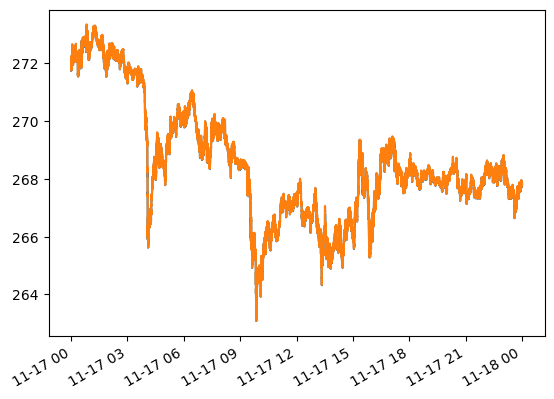

In [26]:
# Use Numba list for njit.
from numba.typed import List
from numba import float64

hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)

local_timestamp = List.empty_list(float64, allocated=10000)
best_bid = List.empty_list(float64, allocated=10000)
best_ask = List.empty_list(float64, allocated=10000)

plot_bbo(hbt, local_timestamp, best_bid, best_ask)

local_timestamp = pd.to_datetime(local_timestamp, unit='us', utc=True)
best_bid = pd.Series(best_bid, index=local_timestamp)
best_ask = pd.Series(best_ask, index=local_timestamp)

best_bid.plot()
best_ask.plot()

### Printing stats

In [27]:
@njit
def submit_order_stats(hbt, recorder):
    buy_order_id = 1
    sell_order_id = 2
    half_spread = 100 * hbt.tick_size
    
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        hbt.clear_inactive_orders()
        
        mid = (hbt.best_bid + hbt.best_ask) / 2.0
        
        if buy_order_id not in hbt.orders:
            order_price = round((mid - half_spread) / hbt.tick_size) * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(buy_order_id, order_price, order_qty, time_in_force)
            
        if sell_order_id not in hbt.orders:
            order_price = round((mid + half_spread) / hbt.tick_size) * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_sell_order(sell_order_id, order_price, order_qty, time_in_force)
            
        recorder.record(hbt)
    return True

=========== Summary ===========
Sharpe ratio: 4.6
Sortino ratio: 6.3
Risk return ratio: 100.1
Annualised return: 162.70 %
Max. draw down: 1.63 %
The number of trades per day: 6
Avg. daily trading volume: 6
Avg. daily trading amount: 1861
Max leverage: 0.94
Median leverage: 0.93


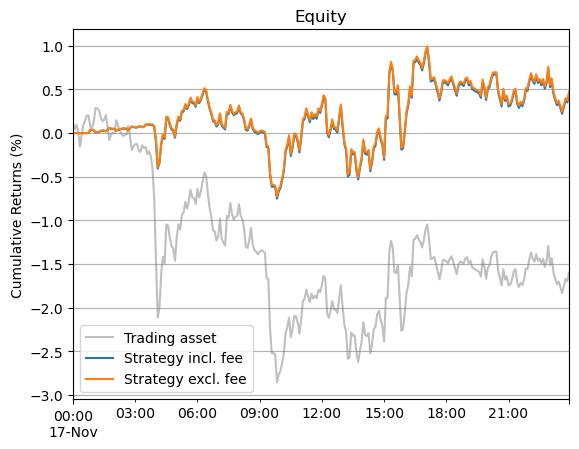

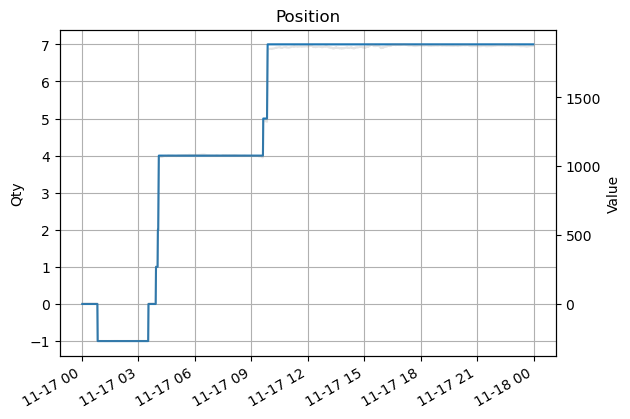

In [28]:
from hftbacktest import Stat

hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)

stat = Stat(hbt)
submit_order_stats(hbt, stat.recorder)
stat.summary(capital=2000)